Detection of heart disease

In [ ]:
##1. import the libraries
import pandas as pd
import numpy as np
import math
from math import sqrt
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model 
import matplotlib.pyplot as plt 

In [ ]:
# 2.read the data set file
df = pd.read_csv('cleveland.csv')
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
#3.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   CP         303 non-null    int64  
 3   Trestbpss  303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   Restecg    303 non-null    int64  
 7   Thalach    303 non-null    int64  
 8   Oldpeak    303 non-null    int64  
 9   Exang      303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    object 
 12  Thal       303 non-null    object 
 13  Num        303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
#4.
df.describe()

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


**Preproccessing Steps**

In [ ]:
# 5. Check if there is missing value
#df.isnull().sum()
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


In [ ]:
# 6. This will select float columns only
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,1


In [ ]:
# 7.Convert categorical features to numerical
df['Ca'] =df['Ca'].astype('category').cat.codes
df['Thal'] =df['Thal'].astype('category').cat.codes
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1,2,3,0,2
2,67,1,4,120,229,0,2,129,1,2,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,2,1
299,68,1,4,144,193,1,0,141,0,3,2,2,2,2
300,57,1,4,130,131,0,0,115,1,1,2,1,2,3
301,57,0,2,130,236,0,2,174,0,0,2,1,0,1


In [ ]:
# 8.Creating the class column for binary classification
df['Class']=df['Num'].apply(lambda x: 1 if x>=1 else 0)
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Num,Class
0,63,1,1,145,233,1,2,150,0,2,3,0,1,0,0
1,67,1,4,160,286,0,2,108,1,1,2,3,0,2,1
2,67,1,4,120,229,0,2,129,1,2,2,2,2,1,1
3,37,1,3,130,250,0,0,187,0,3,3,0,0,0,0
4,41,0,2,130,204,0,2,172,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,2,1,1
299,68,1,4,144,193,1,0,141,0,3,2,2,2,2,1
300,57,1,4,130,131,0,0,115,1,1,2,1,2,3,1
301,57,0,2,130,236,0,2,174,0,0,2,1,0,1,1


In [ ]:
# 9. removing the "Num" column since we are doing a binary classification in the first step because our label col. is called class
df=df.drop(['Num'], axis=1)
df

,Age,Sex,CP,Trestbpss,Chol,Fbs,Restecg,Thalach,Oldpeak,Exang,Slope,Ca,Thal,Class
0,63,1,1,145,233,1,2,150,0,2,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,2,1
299,68,1,4,144,193,1,0,141,0,3,2,2,2,1
300,57,1,4,130,131,0,0,115,1,1,2,1,2,1
301,57,0,2,130,236,0,2,174,0,0,2,1,0,1


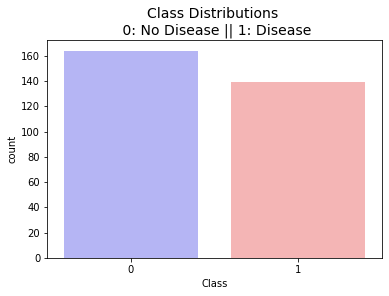

In [ ]:
# view how many 0 and 1 are in the class feature
import seaborn as sns
sns.countplot(x="Class", data=df, palette="bwr")
plt.title('Class Distributions \n 0: No Disease || 1: Disease', fontsize=14)
plt.show()

**Quantitative assesment**

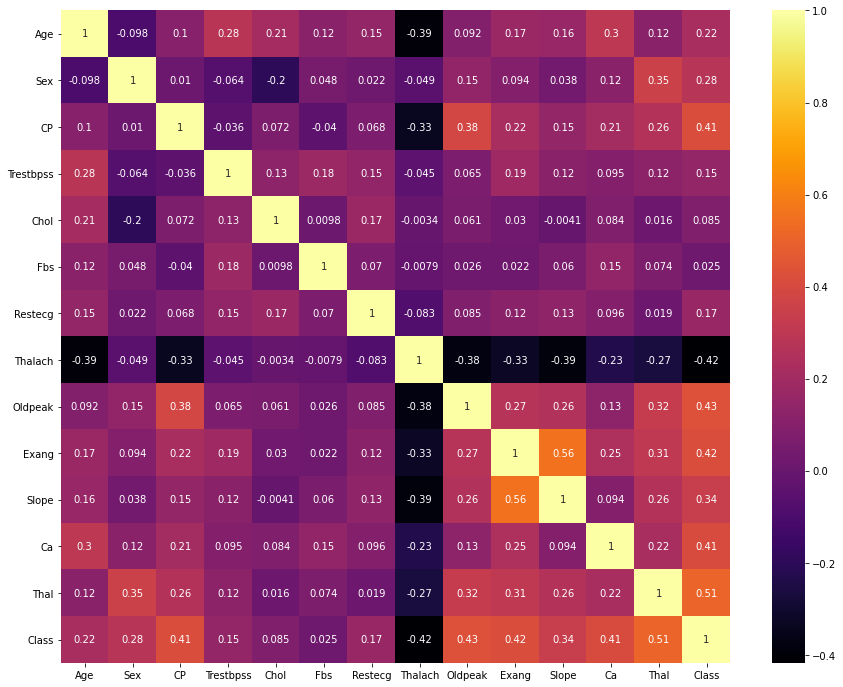

In [ ]:
# 10-Correlation Matrix
corr=df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="inferno")

In [ ]:
## 11. What features have the maximum corrolation

def get_redundant_pairs(x):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, x.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(x, n=14):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(x)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print("---------------------------")
print(get_top_abs_correlations(df,10))

Top Absolute Correlations
---------------------------
Exang    Slope      0.555175
Thal     Class      0.510368
Oldpeak  Class      0.431894
Exang    Class      0.418588
Thalach  Class      0.417167
CP       Class      0.414446
Ca       Class      0.405284
Age      Thalach    0.393806
Thalach  Slope      0.385601
CP       Oldpeak    0.384060
dtype: float64


Feature: 0, Score: 0.06727
Feature: 1, Score: 0.04151
Feature: 2, Score: 0.06053
Feature: 3, Score: 0.02311
Feature: 4, Score: 0.31485
Feature: 5, Score: 0.09036
Feature: 6, Score: 0.01136
Feature: 7, Score: 0.05213
Feature: 8, Score: 0.08943
Feature: 9, Score: 0.03683
Feature: 10, Score: 0.09289
Feature: 11, Score: 0.05031
Feature: 12, Score: 0.06941


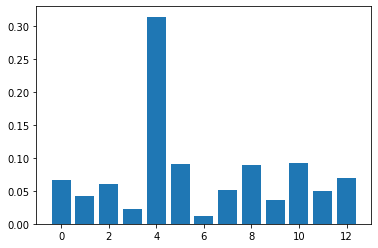

In [23]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=303, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.09800
Feature: 1, Score: 0.06696
Feature: 2, Score: 0.04927
Feature: 3, Score: 0.02956
Feature: 4, Score: 0.22652
Feature: 5, Score: 0.06289
Feature: 6, Score: 0.02180
Feature: 7, Score: 0.08713
Feature: 8, Score: 0.07450
Feature: 9, Score: 0.02298
Feature: 10, Score: 0.13955
Feature: 11, Score: 0.04530
Feature: 12, Score: 0.07552


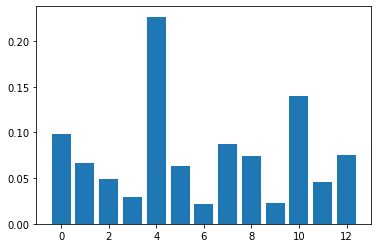

In [21]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=303, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The Significant Value of the Features
Feature: 0, Score: 60.184
Feature: 1, Score: 0.894
Feature: 2, Score: 53.417
Feature: 3, Score: 56.646
Feature: 4, Score: 5.507
Feature: 5, Score: 53.968
Feature: 6, Score: 62.010
Feature: 7, Score: 67.296
Feature: 8, Score: 4.384
Feature: 9, Score: 53.826
Feature: 10, Score: 58.118
Feature: 11, Score: 98.718
Feature: 12, Score: 47.152


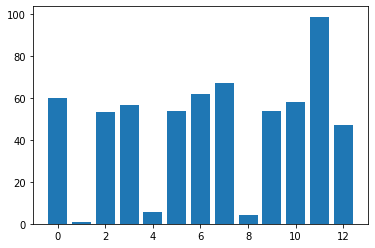

In [ ]:
# 12. Calculate The Significant Value of the Features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=303, n_features=13, n_informative=13, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
#summarize feature importance
#Feature=['Age',	'Sex',	'CP'	,'Trestbpss',	'Chol',	'Fbs',	'Restecg',	'Thalach'	,'Oldpeak'	,'Exang'	,'Slope'	,'Class']
print("The Significant Value of the Features")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
df=df.drop(['Sex','Chol','Exang'],axis=1)

In [ ]:
# 13. Normalization: Scale the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['Age','CP','Trestbpss','Fbs','Restecg' ,'Thalach','Oldpeak','Ca','Thal','Slope','Class'])
# Separate the target from the data set
X = df_scale.drop(['Class'], axis=1)
y = df_scale['Class']


**Split the data set into training and testing sets**

In [ ]:
# 14.Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print('Training instances Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing instances Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training instances Shape: (212, 10)
Training Labels Shape: (212,)
Testing instances Shape: (91, 10)
Testing Labels Shape: (91,)


In [ ]:
# 15.Build the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10)
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"DT" : dec,
          "RF" : ran,
          "MLP" :mlp,
          "KNN" : knn,
          "SVM" : svm,
          "NB" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train,y_train)
    scores[key] = model.score(X_test, y_test)

# 16.Measure the Accuracy
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
MLP,0.879121
RF,0.868132
KNN,0.857143
NB,0.857143
SVM,0.824176
DT,0.758242


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

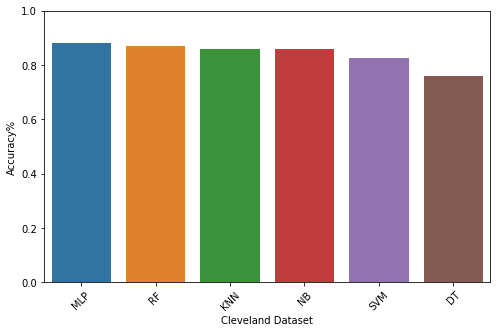

In [ ]:
# 17.PLOT THE RESULTS
plt.figure(figsize=(8,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.ylim(0, 1)
plt.ylabel("Accuracy%")
plt.xlabel("Cleveland Dataset")
plt.xticks(rotation=45)

# **Evaluation Metrics**

In [ ]:
# Recall, F1 Score, Precision

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

    #print('\n')
    #print("d_accuracy" + '\t' + str(d_accuracy))
    #print("v_recall" + '\t' + str(v_recall[0]) + '\t' + str(v_recall[1]) + '\t' + str(d_recallAvg))
    #print("v_prec" + '\t' + str(v_prec[0]) + '\t' + str(v_prec[1]) + '\t' + str(d_precAvg))
    
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.8723    0.8367    0.8542        49
         1.0     0.8182    0.8571    0.8372        42

    accuracy                         0.8462        91
   macro avg     0.8453    0.8469    0.8457        91
weighted avg     0.8473    0.8462    0.8463        91



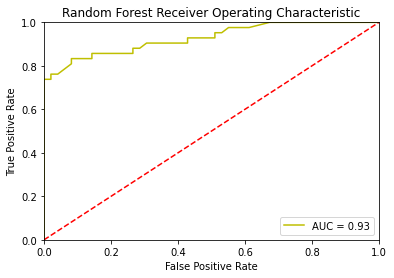

In [ ]:
##### ROC ######################
# 1. Random Forest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

ran = RandomForestClassifier()
ran.fit(X_train, y_train)
probs = ran.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

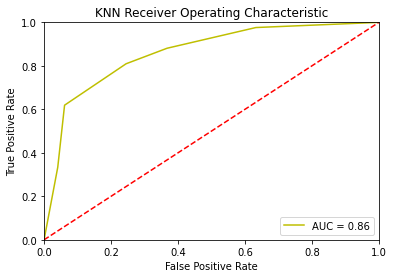

In [ ]:
#2. KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('KNN Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

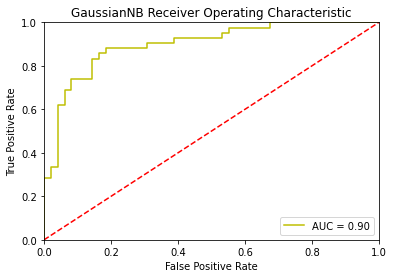

In [ ]:
#3.Gnaive B 
naive = GaussianNB()
naive.fit(X_train, y_train)
probs = naive.predict_proba(X_test)


malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('GaussianNB Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

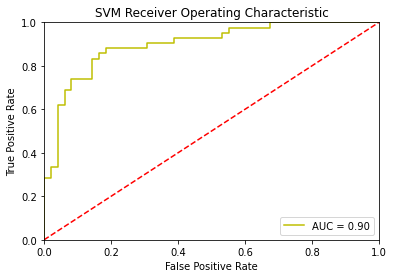

In [ ]:
#4.SVM
svm = SVC()
svm.fit(X_train, y_train)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('SVM Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

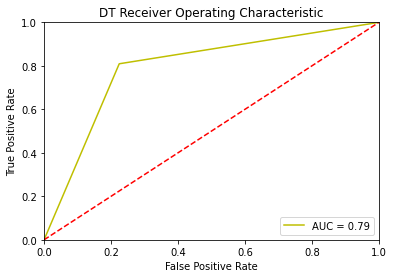

In [ ]:
#5.DT

dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)
probs = dec.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('DT Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()